# Combining all data

In [1]:
!pip install -q easysnowdata
!pip install -q geogif

In [2]:
import pandas as pd
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import easysnowdata
import folium
import earthaccess
import numpy as np
import geogif
from snowexsql.api import LayerMeasurements
import xarray as xr

In [3]:
bbox_gdf = gpd.read_file('../data/grand_mesa.geojson')
sample_area_gdf = gpd.read_file('../data/sample_area.geojson')

start_date = "2019-10-01"
end_date = "2020-09-30"

In [4]:
station_collection = easysnowdata.automatic_weather_stations.StationCollection(sortby_dist_to_geom=bbox_gdf)
station_collection.get_data(['622_CO_SNTL'],variables=['WTEQ','TAVG'])

Sorting by distance to given geometry. See dist_km column.
Geodataframe with all stations has been added to the Station object. Please use the .all_stations attribute to access.
Use the .get_data(stations=geodataframe/string/list,variables=string/list,start_date=str,end_date=str) method to fetch data for specific stations and variables.
Dataframe has been added to the Station object. Please use the .data attribute to access.


In [5]:
df = pd.read_csv('../contributors/andrea/SP_20.csv',skiprows=32)
df=df[df.Site=='Mesa West Open']
df['SWE'] = df['SWE (mm)'].replace(-9999, np.nan)/1000
df

,Location,Site,PitID,Date/Local Standard Time,UTM Zone,Easting (m),Northing (m),Latitude (deg),Longitude (deg),Density A Mean (kg/m^3),Density B Mean (kg/m^3),Density Mean (kg/m^3),SWE A (mm),SWE B (mm),SWE (mm),HS (cm),Flag,SWE
23,Grand Mesa,Mesa West Open,COGMWO_20200305_0809,2020-03-05T08:09,12N,741079,4324261,39.034176,-108.214801,281,281,281.0,248,247,247.5,88.0,NaN,0.2475
24,Grand Mesa,Mesa West Open,COGMWO_20200316_0841,2020-03-16T08:41,12N,741195,4324281,39.034324,-108.213456,294,295,294.5,330,330,330.0,112.0,NaN,0.3300
25,Grand Mesa,Mesa West Open,COGMWO_20200316_1358,2020-03-16T13:58,12N,741305,4324264,39.034141,-108.212192,282,284,283.0,295,295,295.0,104.0,NaN,0.2950
26,Grand Mesa,Mesa West Open,COGMWO_20200316_1519,2020-03-16T15:19,12N,741085,4324297,39.034498,-108.214719,264,275,269.5,211,220,215.5,80.0,NaN,0.2155
27,Grand Mesa,Mesa West Open,COGMWO_20200331_0934,2020-03-31T09:34,12N,741146,4324202,39.033627,-108.214049,273,272,272.5,378,374,376.0,138.0,NaN,0.3760
28,Grand Mesa,Mesa West Open,COGMWO_20200331_1530,2020-03-31T15:30,12N,741147,4324210,39.033698,-108.214035,300,298,299.0,484,481,482.5,161.0,NaN,0.4825
29,Grand Mesa,Mesa West Open,COGMWO_20200408_1551,2020-04-08T15:51,12N,741161,4324240,39.033964,-108.213863,331,324,327.5,441,430,435.5,133.0,STLay,0.4355
30,Grand Mesa,Mesa West Open,COGMWO_20200409_0550,2020-04-09T05:50,12N,741161,4324223,39.033811,-108.213869,329,337,333.0,455,468,461.5,139.0,STCom,0.4615
31,Grand Mesa,Mesa West Open,COGMWO_20200409_1218,2020-04-09T12:18,12N,741144,4324213,39.033726,-108.214068,354,356,355.0,492,495,493.5,139.0,TDG,0.4935
32,Grand Mesa,Mesa West Open,COGMWO_20200409_1615,2020-04-09T16:15,12N,741158,4324242,39.033983,-108.213896,371,364,367.5,421,412,416.5,113.0,NaN,0.4165


In [5]:
s2 = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date=start_date,
    end_date=end_date,
    resolution=40,
    catalog_choice="planetarycomputer",
)

# s2.mask_data()
# s2.get_rgb()
# s2.get_ndsi()

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 13N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To turn this behavior off, set harmonize_to_old=False.
Data scaled to reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


In [6]:
s2.data

<xarray.Dataset> Size: 18GB
Dimensions:      (time: 146, y: 1183, x: 1642)
Coordinates:
  * y            (y) float64 9kB 4.346e+06 4.346e+06 ... 4.298e+06 4.298e+06
  * x            (x) float64 13kB 2.075e+05 2.075e+05 ... 2.731e+05 2.731e+05
    spatial_ref  int32 4B 32613
  * time         (time) datetime64[ns] 1kB 2019-10-02T18:01:51.024000 ... 202...
Data variables: (12/16)
    coastal      (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    blue         (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    green        (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    red          (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    rededge      (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    rededge2     (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    swir22       (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    aot          (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    scl          (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    wvp          (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
    visual       (time, y, x) float32 1GB dask.array<chunksize=(1, 1183, 1642), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

In [12]:
s2_da = s2.data.isel(time=0)

In [ ]:
s2_ndsi_sample_timeseries = s2.ndsi.median(dim=['x','y']).compute()

In [8]:
earthaccess.login()

Enter your Earthdata Login username:  egagli
Enter your Earthdata password:  ········


In [9]:
mod10a1f = easysnowdata.remote_sensing.MODIS_snow(bbox_gdf, start_date='2020-03-15', end_date='2020-03-20', data_product='MOD10A1F')

QUEUEING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/6 [00:00<?, ?it/s]

Data retrieved. Access with the .data attribute.


In [10]:
mod10a1f.data

<xarray.DataArray 'CGF_NDSI_Snow_Cover' (time: 6, y: 98, x: 255)> Size: 150kB
dask.array<concatenate, shape=(6, 98, 255), dtype=uint8, chunksize=(1, 98, 255), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 2kB -9.391e+06 -9.39e+06 ... -9.273e+06 -9.273e+06
  * y            (y) float64 784B 4.36e+06 4.36e+06 ... 4.316e+06 4.315e+06
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 48B 2020-03-15 2020-03-16 ... 2020-03-20
Attributes:
    Key:           0-100=NDSI snow, 200=missing data, 201=no decision, 211=ni...
    long_name:     cloud-gap-filled NDSI snow cover
    valid_range:   0, 100
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    255

In [14]:
s2_da

<xarray.Dataset> Size: 124MB
Dimensions:      (y: 1183, x: 1642)
Coordinates:
  * y            (y) float64 9kB 4.346e+06 4.346e+06 ... 4.298e+06 4.298e+06
  * x            (x) float64 13kB 2.075e+05 2.075e+05 ... 2.731e+05 2.731e+05
    spatial_ref  int32 4B 32613
    time         datetime64[ns] 8B 2019-10-02T18:01:51.024000
Data variables: (12/16)
    coastal      (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    blue         (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    green        (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    red          (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    rededge      (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    rededge2     (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    ...           ...
    swir16       (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    swir22       (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    aot          (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    scl          (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    wvp          (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
    visual       (y, x) float32 8MB dask.array<chunksize=(1183, 1642), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

In [15]:
modis_map = mod10a1f.data.rio.reproject_match(s2_da)

In [18]:
modis_map

<xarray.DataArray 'CGF_NDSI_Snow_Cover' (time: 6, y: 1183, x: 1642)> Size: 12MB
array([[[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
...
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]]], dtype=uint8)
Coordinates:
  * time         (time) datetime64[ns] 48B 2020-03-15 2020-03-16 ... 2020-03-20
    spatial_ref  int64 8B 0
  * x            (x) float64 13kB 2.075e+05 2.075e+05 ... 2.731e+05 2.731e+05
  * y            (y) float64 9kB 4.346e+06 4.346e+06 ... 4.298e+06 4.298e+06
Attributes:
    Key:           0-100=NDSI snow, 200=missing data, 201=no decision, 211=ni...
    long_name:     cloud-gap-filled NDSI snow cover
    valid_range:   0, 100
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    255

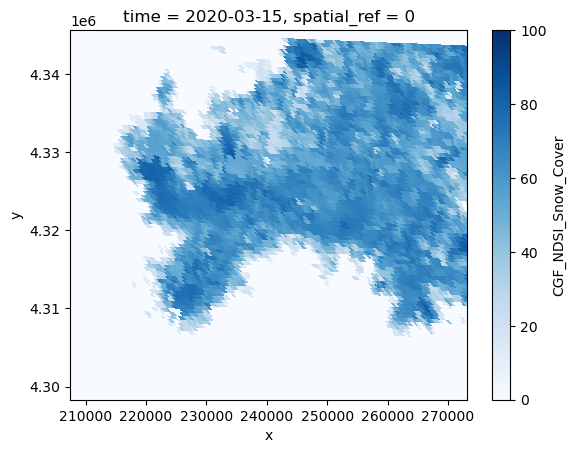

In [21]:
modis_map.isel(time=0).plot.imshow(cmap='Blues',vmax=100)

In [20]:
modis_map = xr.where(modis_map<=100,modis_map,0)

In [18]:
geogif.gif(modis_map,to='modis.gif',cmap='Blues',vmax=100)

In [ ]:
gif_bytes = geogif.dgif(modis_map,bytes=True).compute()

with open("modis.gif", "wb") as f:
    f.write(gif_bytes)

In [ ]:
mod10a1f.data